# UK Retail Online Retail Transactional Data Analysis

The source (https://archive.ics.uci.edu/dataset/352/online+retail) says:
> This is a transactional data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

The **goal** is to **explore the dataset using SQL queries**. This means I'm going to try answering some questions about the data so that I can get more insights about it.


### Load data

In [0]:
df = spark.read.format("csv")\
    .option("inferSchema", True)\
    .option("header", True)\
    .load("/FileStore/tables/Online_Retail.csv")

df.display()

InvoiceNo StockCode Description Quantity InvoiceDate UnitPrice CustomerID Country 536365 85123A WHITE HANGING HEART T-LIGHT HOLDER 6 12/1/2010 8:26 2.55 17850 United Kingdom 536365 71053 WHITE METAL LANTERN 6 12/1/2010 8:26 3.39 17850 United Kingdom 536365 84406B CREAM CUPID HEARTS COAT HANGER 8 12/1/2010 8:26 2.75 17850 United Kingdom 536365 84029G KNITTED UNION FLAG HOT WATER BOTTLE 6 12/1/2010 8:26 3.39 17850 United Kingdom 536365 84029E RED WOOLLY HOTTIE WHITE HEART. 6 12/1/2010 8:26 3.39 17850 United Kingdom 536365 22752 SET 7 BABUSHKA NESTING BOXES 2 12/1/2010 8:26 7.65 17850 United Kingdom 536365 21730 GLASS STAR FROSTED T-LIGHT HOLDER 6 12/1/2010 8:26 4.25 17850 United Kingdom 536366 22633 HAND WARMER UNION JACK 6 12/1/2010 8:28 1.85 17850 United Kingdom 536366 22632 HAND WARMER RED POLKA DOT 6 12/1/2010 8:28 1.85 17850 United Kingdom 536367 84879 ASSORTED COLOUR BIRD ORNAMENT 32 12/1/2010 8:34 1.69 13047 United Kingdom 536367 22745 POPPY'S PLAYHOUSE BEDROOM 6 12/1/2010 8:34 2.1 13047 United Kingdom 536367 22748 POPPY'S PLAYHOUSE KITCHEN 6 12/1/2010 8:34 2.1 13047 United Kingdom 536367 22749 FELTCRAFT PRINCESS CHARLOTTE DOLL 8 12/1/2010 8:34 3.75 13047 United Kingdom 536367 22310 IVORY KNITTED MUG COSY 6 12/1/2010 8:34 1.65 13047 United Kingdom 536367 84969 BOX OF 6 ASSORTED COLOUR TEASPOONS 6 12/1/2010 8:34 4.25 13047 United Kingdom 536367 22623 BOX OF VINTAGE JIGSAW BLOCKS 3 12/1/2010 8:34 4.95 13047 United Kingdom 536367 22622 BOX OF VINTAGE ALPHABET BLOCKS 2 12/1/2010 8:34 9.95 13047 United Kingdom 536367 21754 HOME BUILDING BLOCK WORD 3 12/1/2010 8:34 5.95 13047 United Kingdom 536367 21755 LOVE BUILDING BLOCK WORD 3 12/1/2010 8:34 5.95 13047 United Kingdom 536367 21777 RECIPE BOX WITH METAL HEART 4 12/1/2010 8:34 7.95 13047 United Kingdom 536367 48187 DOORMAT NEW ENGLAND 4 12/1/2010 8:34 7.95 13047 United Kingdom 536368 22960 JAM MAKING SET WITH JARS 6 12/1/2010 8:34 4.25 13047 United Kingdom 536368 22913 RED COAT RACK PARIS FASHION 3 12/1/2010 8:34 4.95 13047 United Kingdom 536368 22912 YELLOW COAT RACK PARIS FASHION 3 12/1/2010 8:34 4.95 13047 United Kingdom 536368 22914 BLUE COAT RACK PARIS FASHION 3 12/1/2010 8:34 4.95 13047 United Kingdom 536369 21756 BATH BUILDING BLOCK WORD 3 12/1/2010 8:35 5.95 13047 United Kingdom 536370 22728 ALARM CLOCK BAKELIKE PINK 24 12/1/2010 8:45 3.75 12583 France 536370 22727 ALARM CLOCK BAKELIKE RED 24 12/1/2010 8:45 3.75 12583 France 536370 22726 ALARM CLOCK BAKELIKE GREEN 12 12/1/2010 8:45 3.75 12583 France 536370 21724 PANDA AND BUNNIES STICKER SHEET 12 12/1/2010 8:45 0.85 12583 France 536370 21883 STARS GIFT TAPE 24 12/1/2010 8:45 0.65 12583 France 536370 10002 INFLATABLE POLITICAL GLOBE 48 12/1/2010 8:45 0.85 12583 France 536370 21791 VINTAGE HEADS AND TAILS CARD GAME 24 12/1/2010 8:45 1.25 12583 France 536370 21035 SET/2 RED RETROSPOT TEA TOWELS 18 12/1/2010 8:45 2.95 12583 France 536370 22326 ROUND SNACK BOXES SET OF4 WOODLAND 24 12/1/2010 8:45 2.95 12583 France 536370 22629 SPACEBOY LUNCH BOX 24 12/1/2010 8:45 1.95 12583 France 536370 22659 LUNCH BOX I LOVE LONDON 24 12/1/2010 8:45 1.95 12583 France 536370 22631 CIRCUS PARADE LUNCH BOX 24 12/1/2010 8:45 1.95 12583 France 536370 22661 CHARLOTTE BAG DOLLY GIRL DESIGN 20 12/1/2010 8:45 0.85 12583 France 536370 21731 RED TOADSTOOL LED NIGHT LIGHT 24 12/1/2010 8:45 1.65 12583 France 536370 22900 SET 2 TEA TOWELS I LOVE LONDON 24 12/1/2010 8:45 2.95 12583 France 536370 21913 VINTAGE SEASIDE JIGSAW PUZZLES 12 12/1/2010 8:45 3.75 12583 France 536370 22540 MINI JIGSAW CIRCUS PARADE 24 12/1/2010 8:45 0.42 12583 France 536370 22544 MINI JIGSAW SPACEBOY 24 12/1/2010 8:45 0.42 12583 France 536370 22492 MINI PAINT SET VINTAGE 36 12/1/2010 8:45 0.65 12583 France 536370 POST POSTAGE 3 12/1/2010 8:45 18.0 12583 France 536371 22086 PAPER CHAIN KIT 50'S CHRISTMAS 80 12/1/2010 9:00 2.55 13748 United Kingdom 536372 22632 HAND WARMER RED POLKA DOT 6 12/1/2010 9:01 1.85 17850 United Kingdom 536372 22633 HAND WARMER UNION JACK 6 12/1/2010 9:01 1

### Create temporary view

Thus, we are abe to run SQL queries on the data.

In [0]:
df.createTempView("retail")

## Exploring

The exploration follows as follows:
- I'm going to explore it using *Business Questions*.
- I might add a few sentences regarding the findings for question.
- During exploration, I found out that **Quantity** and **UnitPrice** might be negative. This might be related to adjustments in the transactions, informing problem with item, and even returning products/items. Therefore, **I avoid including these entries in some of my queries**.


As mentioned before, I might not include transactions that...
- have zero (item) quantity,
- have zero product price per unit, and
- were cancelled (i.e., transactions).

Then, let's ask some (business) questions...


**What are the top 10 customers by spending?**

In [0]:
%sql

SELECT
  CustomerID,
  ROUND(SUM(Quantity * UnitPrice),2) AS total_spent
FROM retail
WHERE CustomerID IS NOT NULL AND
      Quantity > 0 AND 
      UnitPrice > 0 AND
      InvoiceNo NOT LIKE 'C%'
GROUP BY CustomerID
SORT BY total_spent DESC
LIMIT 10

CustomerID total_spent 14646 280206.02 18102 259657.3 17450 194550.79 16446 168472.5 14911 143825.06 12415 124914.53 14156 117379.63 17511 91062.38 16029 81024.84 12346 77183.6


**What's the number of transactions per country?**

In [0]:
%sql

SELECT
  Country,
  count(DISTINCT InvoiceNo) as num_transactions
FROM retail
WHERE Quantity > 0 AND 
        UnitPrice > 0 AND
        InvoiceNo NOT LIKE 'C%'
GROUP BY Country
ORDER BY num_transactions DESC


Country num_transactions United Kingdom 18019 Germany 457 France 392 EIRE 288 Belgium 98 Netherlands 94 Spain 90 Portugal 58 Australia 57 Switzerland 54 Finland 41 Italy 38 Sweden 36 Norway 36 Channel Islands 26 Japan 19 Poland 19 Denmark 18 Austria 17 Cyprus 16 Unspecified 13 Hong Kong 11 Israel 8 Singapore 7 Iceland 7 Canada 6 Greece 5 Malta 5 USA 5 European Community 4 Lithuania 4 United Arab Emirates 3 Bahrain 3 Czech Republic 2 RSA 1 Saudi Arabia 1 Brazil 1 Lebanon 1


- UK, Germany and France are the top 3 in number of transactions.


**What's the total sales per product?**

In [0]:
%sql

SELECT
    StockCode,
    Description,
    ROUND(SUM(Quantity * UnitPrice),2) AS total_sales
FROM retail
WHERE Quantity > 0 AND 
        UnitPrice > 0 AND
        InvoiceNo NOT LIKE 'C%'
GROUP BY StockCode, Description
ORDER BY total_sales DESC

StockCode Description total_sales DOT DOTCOM POSTAGE 206248.77 22423 REGENCY CAKESTAND 3 TIER 174484.74 23843 PAPER CRAFT , LITTLE BIRDIE 168469.6 85123A WHITE HANGING HEART T-LIGHT HOLDER 104340.29 47566 PARTY BUNTING 99504.33 85099B JUMBO BAG RED RETROSPOT 94340.05 23166 MEDIUM CERAMIC TOP STORAGE JAR 81700.92 M Manual 78110.27 POST POSTAGE 78101.88 23084 RABBIT NIGHT LIGHT 66964.99 22086 PAPER CHAIN KIT 50'S CHRISTMAS 64952.29 84879 ASSORTED COLOUR BIRD ORNAMENT 59094.93 79321 CHILLI LIGHTS 54117.76 23298 SPOTTY BUNTING 42548.13 22386 JUMBO BAG PINK POLKADOT 42436.24 21137 BLACK RECORD COVER FRAME 40652.13 22502 PICNIC BASKET WICKER 60 PIECES 39619.5 23284 DOORMAT KEEP CALM AND COME IN 38166.64 22720 SET OF 3 CAKE TINS PANTRY DESIGN 38158.39 22960 JAM MAKING SET WITH JARS 37128.88 82484 WOOD BLACK BOARD ANT WHITE FINISH 36030.22 20725 LUNCH BAG RED RETROSPOT 35752.01 22197 POPCORN HOLDER 34298.87 22178 VICTORIAN GLASS HANGING T-LIGHT 33187.97 22114 HOT WATER BOTTLE TEA AND SYMPATHY 33002.59 22910 PAPER CHAIN KIT VINTAGE CHRISTMAS 32873.34 22112 CHOCOLATE HOT WATER BOTTLE 32866.18 85099F JUMBO BAG STRAWBERRY 32570.47 22469 HEART OF WICKER SMALL 32107.8 23245 SET OF 3 REGENCY CAKE TINS 31177.95 21931 JUMBO STORAGE BAG SUKI 30770.12 22727 ALARM CLOCK BAKELIKE RED 30701.12 23199 JUMBO BAG APPLES 30475.65 22470 HEART OF WICKER LARGE 30139.41 22355 CHARLOTTE BAG SUKI DESIGN 29277.95 22699 ROSES REGENCY TEACUP AND SAUCER 29095.27 23355 HOT WATER BOTTLE KEEP CALM 28842.55 22411 JUMBO SHOPPER VINTAGE RED PAISLEY 28634.95 22457 NATURAL SLATE HEART CHALKBOARD 28147.96 85099C JUMBO BAG BAROQUE BLACK WHITE 28092.2 20685 DOORMAT RED RETROSPOT 28082.54 23201 JUMBO BAG ALPHABET 27890.17 22726 ALARM CLOCK BAKELIKE GREEN 27196.53 84347 ROTATING SILVER ANGELS T-LIGHT HLDR 26463.83 21915 RED HARMONICA IN BOX 26331.58 22666 RECIPE BOX PANTRY YELLOW DESIGN 26240.6 21175 GIN + TONIC DIET METAL SIGN 25836.57 22629 SPACEBOY LUNCH BOX 25740.47 22961 JAM MAKING SET PRINTED 25660.98 48138 DOORMAT UNION FLAG 25609.6 21181 PLEASE ONE PERSON METAL SIGN 25290.58 23173 REGENCY TEAPOT ROSES 24918.93 21621 VINTAGE UNION JACK BUNTING 24542.83 23203 JUMBO BAG VINTAGE DOILY 24522.36 22111 SCOTTIE DOG HOT WATER BOTTLE 24509.84 22722 SET OF 6 SPICE TINS PANTRY DESIGN 24483.66 22326 ROUND SNACK BOXES SET OF4 WOODLAND 24438.62 48187 DOORMAT NEW ENGLAND 24292.84 22138 BAKING SET 9 PIECE RETROSPOT 24239.72 21731 RED TOADSTOOL LED NIGHT LIGHT 23932.98 48185 DOORMAT FAIRY CAKE 23888.81 23344 JUMBO BAG 50'S CHRISTMAS 23815.75 23243 SET OF TEA COFFEE SUGAR TINS PANTRY 23514.17 22189 CREAM HEART CARD HOLDER 23463.47 21733 RED HANGING HEART T-LIGHT HOLDER 23228.74 21929 JUMBO BAG PINK VINTAGE PAISLEY 23181.14 82482 WOODEN PICTURE FRAME WHITE FINISH 23113.26 20713 JUMBO BAG OWLS 23030.96 21623 VINTAGE UNION JACK MEMOBOARD 23010.09 22139 RETROSPOT TEA SET CERAMIC 11 PC 22912.81 22697 GREEN REGENCY TEACUP AND SAUCER 22826.3 22090 PAPER BUNTING RETROSPOT 22790.96 85066 CREAM SWEETHEART MINI CHEST 22708.95 20727 LUNCH BAG BLACK SKULL. 22421.21 15056N EDWARDIAN PARASOL NATURAL 22176.49 84029E RED WOOLLY HOTTIE WHITE HEART. 22144.98 48194 DOORMAT HEARTS 22138.57 20712 JUMBO BAG WOODLAND ANIMALS 22092.42 23202 JUMBO BAG VINTAGE LEAF 21852.81 20724 RED RETROSPOT CHARLOTTE BAG 21776.79 20728 LUNCH BAG CARS BLUE 21750.63 22630 DOLLY GIRL LUNCH BOX 21635.14 21523 DOORMAT FANCY FONT HOME SWEET HOME 21601.69 21843 RED RETROSPOT CAKE STAND 21365.25 21212 PACK OF 72 RETROSPOT CAKE CASES 21259.1 21166 COOK WITH WINE METAL SIGN 20957.64 23206 LUNCH BAG APPLE DESIGN 20911.98 22659 LUNCH BOX I LOVE LONDON 20818.7 22728 ALARM CLOCK BAKELIKE PINK 20702.15 21479 WHITE SKULL HOT WATER BOTTLE 20594.45 82494L WOODEN FRAME ANTIQUE WHITE 19640.79 84946 ANTIQUE SILVER T-LIGHT GLASS 19411.62 22501 PICNIC BASKET WICKER LARGE 19322.16 22328 ROUND SNACK BOXES SET OF 4 FRUITS 19130.37 22467 GUMBALL COAT RACK 18890.47 22969 HOMEMADE JAM SCENTED CANDLES 18788.55 22383 LUNCH BAG SUKI DESIGN 18750.58 15036 ASS

**Remarks**
- Some codes do not follow the 5-digit integral number rule, and after checking the Description, these entries mean some adjustments in the transactions such as "Adjust bad debt", "Manual", "Amazonn Fee", and etc.


**What's the average basket size (items) per customer?**

In [0]:
%sql

WITH customer_invoice AS (
  SELECT 
    CustomerID, 
    InvoiceNo,
    SUM(Quantity) AS total_quantity 
  FROM retail
  WHERE Quantity > 0
  GROUP BY CustomerID, InvoiceNo
)

SELECT
  CustomerID,
  ROUND(AVG(total_quantity),2) AS avg_basket_size
FROM customer_invoice
GROUP BY CustomerID
ORDER BY avg_basket_size DESC

CustomerID avg_basket_size 12346 74215.0 16446 40498.5 13256 12540.0 18251 7824.0 15749 6009.33 13135 4300.0 16754 4280.0 12415 3698.57 12688 3028.0 15372 2924.0 13027 2880.0 12357 2708.0 14646 2668.8 12378 2529.0 12752 2262.0 17404 2183.2 12754 2160.33 12590 2141.5 17511 2082.23 16308 2000.0 18087 1953.5 12753 1903.5 12931 1866.93 18079 1858.0 12409 1850.33 16684 1794.82 12501 1783.0 14609 1756.5 12798 1752.0 13081 1741.82 13316 1737.0 16000 1703.33 12830 1641.33 14124 1618.0 16253 1616.5 12433 1581.57 16380 1524.0 17450 1521.59 16377 1500.0 16333 1462.91 14286 1446.0 15118 1440.0 15195 1404.0 17313 1402.0 12398 1394.0 18133 1350.0 13422 1326.0 14298 1325.98 12451 1315.0 13694 1266.24 14382 1237.0 12497 1236.0 13848 1233.33 12607 1228.0 16984 1211.5 17597 1176.0 14101 1157.0 14212 1152.0 15769 1141.23 15786 1121.33 14887 1100.0 14014 1076.0 18102 1068.73 12758 1067.5 14156 1052.45 17414 1050.0 17553 1048.0 16751 1031.0 12435 1027.5 12875 1009.5 12454 1006.0 17354 1006.0 14904 992.5 15032 989.33 13868 982.0 17940 975.5 14088 974.23 12876 970.5 14049 967.5 15838 966.74 14096 961.88 13805 950.0 16182 947.75 13850 944.0 14935 935.0 12536 934.33 16281 934.0 14769 929.5 12818 929.0 18139 926.17 13678 924.0 12678 910.25 12847 909.0 12406 909.0 17084 908.0 15947 898.0 16053 896.5 15978 888.0 16303 886.33 17381 884.45 17205 884.0 12557 876.8 13802 857.33 12405 857.0 12611 846.0 17672 845.0 14680 842.25 14607 840.43 17857 837.22 15665 833.0 13340 824.29 12901 824.11 16240 820.5 15341 812.0 17107 806.17 12625 806.0 14105 800.0 14566 800.0 13639 800.0 14488 799.0 15157 797.33 15113 795.33 14258 788.89 15484 788.0 13253 786.0 14158 781.0 14544 771.5 12985 766.5 14459 760.0 13224 759.0 16101 757.0 17919 756.0 15676 750.67 12744 748.71 13790 748.0 12755 745.5 12770 743.0 12700 741.75 15146 736.5 18022 736.0 16180 733.38 13763 728.0 17806 727.0 13583 725.0 14828 724.0 14885 724.0 16940 723.0 13685 722.29 13124 715.67 13952 715.5 17499 711.0 14000 710.0 17444 706.33 12731 703.08 17602 691.83 13165 688.0 16270 688.0 13328 680.0 17949 678.8 13635 677.0 16494 675.0 16532 672.0 15382 668.67 15185 666.0 13555 665.0 17379 663.0 14277 661.33 16422 660.86 17015 660.33 13989 656.5 18145 656.25 15330 656.0 17037 656.0 12534 651.0 17727 645.0 16715 642.0 16152 642.0 15318 642.0 13815 640.0 16873 640.0 12585 639.5 13979 639.0 16029 638.22 18142 638.0 16938 635.0 16843 634.94 18194 632.0 12397 631.5 12349 631.0 15004 630.0 16902 629.0 17596 628.57 15093 626.67 17282 625.67 13744 624.5 13365 623.5 13505 621.5 18082 621.0 17593 620.2 18117 618.0 17244 616.0 16108 615.0 17416 614.57 12867 614.0 12714 613.8 12762 613.5 14535 610.33 12939 609.5 12477 608.83 14222 607.0 14301 606.0 17306 604.79 13354 604.0 15061 602.5 17353 600.0 13791 600.0 15653 600.0 16881 600.0 12908 600.0 16258 598.8 12578 598.0 15123 597.5 17365 597.13 15245 594.67 14725 593.0 16656 592.93 12472 592.57 13334 591.33 13421 590.5 12438 590.0 12370 588.25 12635 586.0 12348 585.25 15795 581.0 16256 581.0 16160 581.0 12638 577.0 16505 576.0 15415 575.0 14533 574.14 15494 574.0 15076 571.0 14418 570.33 13098 570.29 13918 570.0 12550 569.0 17744 568.67 13851 568.33 15228 563.75 14866 562.67 12976 561.0 15251 561.0 13501 560.0 12597 559.0 13336 559.0 12772 556.0 15531 552.5 13373 550.33 14125 546.67 14739 545.71 12456 544.33 15985 543.0 17340 542.45 16800 540.0 16948 538.0 14306 537.5 13278 537.0 12475 535.0 13572 534.0 13209 531.63 16126 531.25 14016 531.25 12356 530.33 12354 530.0 18287 528.67 16041 528.0 13726 527.0 14439 526.0 18235 526.0 17970 525.0 13414 524.67 17082 524.5 16504 524.0 15416 522.5 14934 521.0 12766 520.86 16394 520.8 14121 520.5 13324 520.5 16986 520.0 15069 520.0 15980 520.0 13644 516.75 12539 516.75 14164 516.5 17426 515.67 17966 514.2 13285 512.75 13689 512.0 13753 512.0 14936 510.63 14139 510.0 17046 510.0 14557 510.0 12713 508.0 15977 508.0 13849 508.0 13988 507.33 13881 505.9 12652 505.0 14175 505.0 17044 504.0 17443 504.0 17311 502.5 13233 502.0 16340 501.0 17978 499.0


- The customer `12346` is the Top 1 in average basket size, but it's the Top 10 in number of transactions. This means this customer doesn't make too much transactions (i.e., compared to the Top 10 customers), but it when it makes a transaction is usually have many items in its basket.


**What's the monthly revenue trend?**

In [0]:
%sql

WITH monthly AS (
  SELECT
    date_format(to_timestamp(InvoiceDate, 'M/d/yyyy H:mm'), "yyyy-MM") AS year_month,
    Quantity,
    UnitPrice
  FROM retail
  WHERE Quantity > 0 AND 
        UnitPrice > 0 AND
        InvoiceNo NOT LIKE 'C%'
  ORDER BY year_month
)

SELECT
  year_month,
  ROUND(SUM(Quantity * UnitPrice),2) AS revenue,
  ROUND(SUM( ROUND(SUM(Quantity * UnitPrice),2) ) OVER(ORDER BY year_month)) AS revenue_recurring,
  ROUND(SUM(Quantity * UnitPrice) - LAG(SUM(Quantity * UnitPrice)) OVER(ORDER BY year_month),2) AS revenue_difference
FROM monthly
GROUP BY year_month
ORDER BY year_month


year_month revenue revenue_recurring revenue_difference 2010-12 823746.14 823746.0 null 2011-01 691364.56 1515111.0 -132381.58 2011-02 523631.89 2038743.0 -167732.67 2011-03 717639.36 2756382.0 194007.47 2011-04 537808.62 3294191.0 -179830.74 2011-05 770536.02 4064727.0 232727.4 2011-06 761739.9 4826466.0 -8796.12 2011-07 719221.19 5545688.0 -42518.71 2011-08 759138.38 6304826.0 39917.19 2011-09 1058590.17 7363416.0 299451.79 2011-10 1154979.3 8518396.0 96389.13 2011-11 1509496.33 1.0027892E7 354517.03 2011-12 638792.68 1.0666685E7 -870703.65


**REMARK**:
Let's plot the revenue so that we can better check the (monthly) trend.<br>
Then, I run the same query as before and store the results to a Spark DataFrame, and <br>
convert it to a Pandas DataFrame. Thus, I'm able to plot the revenue.

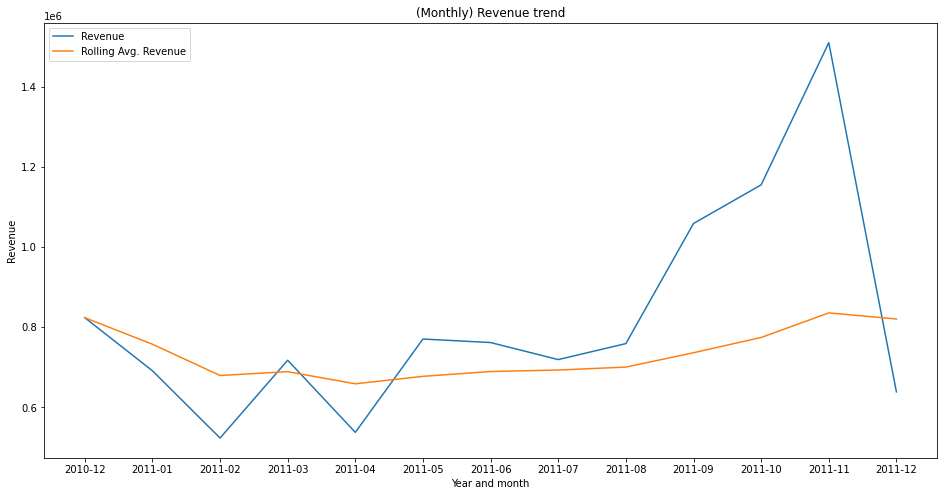

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

revenue_trend = spark.sql("""

WITH monthly AS (
  SELECT
    date_format(to_timestamp(InvoiceDate, 'M/d/yyyy H:mm'), "yyyy-MM") AS year_month,
    Quantity,
    UnitPrice
  FROM retail
  WHERE Quantity > 0 AND 
        UnitPrice > 0 AND
        InvoiceNo NOT LIKE 'C%'
  ORDER BY year_month
)

SELECT
  year_month,
  ROUND(SUM(Quantity * UnitPrice),2) AS revenue,
  ROUND(SUM( ROUND(SUM(Quantity * UnitPrice),2) ) OVER(ORDER BY year_month)) AS revenue_recurring,
  AVG(SUM(Quantity * UnitPrice)) OVER(ORDER BY year_month) AS rolling_avg,
  ROUND(SUM(Quantity * UnitPrice) - LAG(SUM(Quantity * UnitPrice)) OVER(ORDER BY year_month),2) AS revenue_difference
FROM monthly
GROUP BY year_month
ORDER BY year_month

""")

revenue_trend_df = revenue_trend.toPandas()

# Plot revenue trend
fig, axes = plt.subplots(figsize=(16,8))
sns.lineplot(data=revenue_trend_df, x="year_month", y="revenue", label="Revenue",ax=axes)
sns.lineplot(data=revenue_trend_df, x="year_month", y="rolling_avg", label="Rolling Avg. Revenue", ax=axes)

axes.set(title="(Monthly) Revenue trend", xlabel="Year and month", ylabel="Revenue");


**What's the most returned products?**

In this context, I want to know the most returned/cancelled products.

I find out that some transactions present negative "quantity" as well as zero values for "UnitPrice". I'm assuming that for those cases, there are some looses. The Description field also confirmes that. Therefore, I'm assuming returning products in which the transactions were cancelled. Also, I'm avoinding transactions that presents "Discount" in the Description field.

**Remark:**
> If this code starts with letter 'c', it indicates a cancellation

In [0]:
%sql

SELECT
  Description,
  SUM(ABS(quantity)) AS num_returns
FROM retail
WHERE InvoiceNo LIKE 'C%' AND 
      Description != "Discount"
GROUP BY Description
ORDER BY num_returns DESC

Description num_returns PAPER CRAFT , LITTLE BIRDIE 80995 MEDIUM CERAMIC TOP STORAGE JAR 74494 ROTATING SILVER ANGELS T-LIGHT HLDR 9376 Manual 4066 FAIRY CAKE FLANNEL ASSORTED COLOUR 3150 PINK BLUE FELT CRAFT TRINKET BOX 2617 WHITE HANGING HEART T-LIGHT HOLDER 2578 GIN + TONIC DIET METAL SIGN 2030 HERB MARKER BASIL 1527 FELTCRAFT DOLL MOLLY 1447 TEA TIME PARTY BUNTING 1424 PAPER POCKET TRAVELING FAN 1385 WORLD WAR 2 GLIDERS ASSTD DESIGNS 1200 COLOUR GLASS. STAR T-LIGHT HOLDER 1174 JUMBO BAG RED RETROSPOT 1115 HOME SWEET HOME MUG 1052 PANTRY CHOPPING BOARD 946 PLACE SETTING WHITE HEART 890 FELTCRAFT BUTTERFLY HEARTS 877 REGENCY CAKESTAND 3 TIER 857 ASSORTED COLOURS SILK FAN 744 JUMBO BAG APPLES 723 MIRROR MOSAIC T-LIGHT HOLDER 720 REGENCY TEA PLATE ROSES 718 REVOLVER WOODEN RULER 716 GIRAFFE WOODEN RULER 714 VINTAGE BILLBOARD TEA MUG 701 SAVE THE PLANET MUG 685 DOORMAT FAIRY CAKE 674 ROUND SNACK BOXES SET OF 4 FRUITS 658 FELTCRAFT 6 FLOWER FRIENDS 623 JUMBO BAG ALPHABET 594 FLOWERS CHANDELIER T-LIGHT HOLDER 579 LUNCH BAG RED RETROSPOT 574 JUMBO BAG VINTAGE DOILY 568 12 PENCILS SMALL TUBE SKULL 566 RAIN PONCHO RETROSPOT 528 SMALL CERAMIC TOP STORAGE JAR 525 VANILLA SCENT CANDLE JEWELLED BOX 505 MIRROR MOSAIC T-LIGHT HOLDER ROUND 482 JUMBO BAG PINK POLKADOT 456 OCEAN SCENT CANDLE IN JEWELLED BOX 454 PAPER CHAIN KIT 50'S CHRISTMAS 453 VICTORIAN GLASS HANGING T-LIGHT 450 LUNCH BAG ALPHABET DESIGN 448 ROSES REGENCY TEACUP AND SAUCER 437 ALPHABET STENCIL CRAFT 437 BEADED CHANDELIER T-LIGHT HOLDER 433 IVORY CHANDELIER T-LIGHT HOLDER 432 POPCORN HOLDER 427 BASKET OF TOADSTOOLS 408 HOT WATER BOTTLE I AM SO POORLY 394 PACK OF 72 RETROSPOT CAKE CASES 380 STRAWBERRY CERAMIC TRINKET BOX 363 JUMBO SHOPPER VINTAGE RED PAISLEY 354 WOODEN FRAME ANTIQUE WHITE 353 PAPER CHAIN KIT VINTAGE CHRISTMAS 351 IVORY DINER WALL CLOCK 344 JUMBO STORAGE BAG SUKI 334 JAM MAKING SET PRINTED 331 36 DOILIES VINTAGE CHRISTMAS 324 MIRROR MOSAIC VOTIVE HOLDER 324 RED RETROSPOT CAKE STAND 322 LUNCH BOX I LOVE LONDON 322 ANTIQUE SILVER T-LIGHT GLASS 316 60 CAKE CASES VINTAGE CHRISTMAS 312 ASSTD FRUIT+FLOWERS FRIDGE MAGNETS 307 FELTCRAFT CUSHION OWL 302 FRIDGE MAGNETS LA VIE EN ROSE 301 GOLD MINI TAPE MEASURE 300 WRAP CHRISTMAS VILLAGE 300 SMALL RED RETROSPOT MUG IN BOX 296 VICTORIAN METAL POSTCARD SPRING 296 WHITE TALL PORCELAIN T-LIGHT HOLDER 292 BATHROOM METAL SIGN 290 VICTORIAN SEWING KIT 289 RED FLORAL FELTCRAFT SHOULDER BAG 289 BOYS ALPHABET IRON ON PATCHES 288 SMALL WHITE RETROSPOT MUG IN BOX 286 JUMBO BAG BAROQUE BLACK WHITE 281 PARTY BUNTING 277 WOODEN SCHOOL COLOURING SET 276 DOLLY GIRL LUNCH BOX 275 PAINT YOUR OWN CANVAS SET 273 JUMBO BAG VINTAGE CHRISTMAS 271 CHARLOTTE BAG PINK POLKADOT 266 JUMBO BAG SCANDINAVIAN BLUE PAISLEY 265 SILVER HANGING T-LIGHT HOLDER 263 JUMBO BAG 50'S CHRISTMAS 262 SET OF 20 VINTAGE CHRISTMAS NAPKINS 259 CHRISTMAS METAL TAGS ASSORTED 258 SET OF 3 BABUSHKA STACKING TINS 255 JUMBO BAG STRAWBERRY 250 OFFICE MUG WARMER PINK 250 JAM MAKING SET WITH JARS 247 FELTCRAFT CUSHION RABBIT 245 JUMBO BAG OWLS 243 JUMBO BAG VINTAGE LEAF 242 JUMBO BAG WOODLAND ANIMALS 240 SET OF 6 NATIVITY MAGNETS 240 MIRROR MOSAIC GOBLET CANDLE HOLDER 240 RED RETROSPOT PEG BAG 238 FRIDGE MAGNETS US DINER ASSORTED 234 WOODEN PICTURE FRAME WHITE FINISH 233 LARGE CIRCULAR MIRROR MOBILE 228 DOORMAT KEEP CALM AND COME IN 225 BLUE POLKADOT WRAP 225 RED RETROSPOT CHARLOTTE BAG 223 JUMBO BAG PINK VINTAGE PAISLEY 222 LUNCH BAG CARS BLUE 214 RED RETROSPOT OVEN GLOVE 212 SET 2 TEA TOWELS I LOVE LONDON 208 WOOD 2 DRAWER CABINET WHITE FINISH 206 FEATHER PEN,COAL BLACK 206 HAND WARMER BABUSHKA DESIGN 203 SET/2 RED RETROSPOT TEA TOWELS 200 WHITE ROCKING HORSE HAND PAINTED 200 MINI PAINT SET VINTAGE 196 CARD HOLDER GINGHAM HEART 195 FELTCRAFT CUSHION BUTTERFLY 194 ROSE 1 WICK MORRIS BOXED CANDLE 193 HEART WOODEN CHRISTMAS DECORATION 192 CHARLOTTE BAG VINTAGE ALPHABET 191 RED TOADSTOOL LED NIGHT LIGHT 186 CHARLOTTE BAG APPLES DESIGN 186 ASSTD DESIGN RACING CAR PEN 185 WHITE SKU


**Checking on Customer Retention (First vs. Repeat Purchase)**

Let's assume that a churned customer is someone who purchased once and never came back to purchase another time. If a customer purchased multiple times, that customer was retained.

In [0]:
%sql

CREATE OR REPLACE TEMP VIEW count_purchase_view AS (
  WITH first_purchase AS (
    SELECT DISTINCT
      CustomerID,
      InvoiceNo,
      date_format(to_timestamp(InvoiceDate, "M/d/yyyy H:m"), "yyyy-MM-dd") AS purchase_datetime
    FROM retail
    WHERE CustomerID IS NOT NULL AND
          InvoiceNo NOT LIKE 'C%'
    ORDER BY CustomerID, purchase_datetime
  ),
  count_purchases AS (
    SELECT
      CustomerID,
      COUNT(1) AS num_purchases
    FROM first_purchase
    GROUP BY CustomerID
  )
  SELECT * FROM count_purchases
)

In [0]:
%sql

SELECT 
  COUNT(1) AS total_customers,
  COUNT(CASE WHEN num_purchases = 1 THEN 1 ELSE NULL END) AS num_churn,
  COUNT(CASE WHEN num_purchases > 1 THEN 1 ELSE NULL END) AS num_retention
FROM count_purchase_view



total_customers num_churn num_retention 4339 1494 2845

**REMARKS**
- You can check churned/retained customer by checking **count_purchases** table.

In [0]:
%sql

SELECT *
FROM count_purchase_view
LIMIT 10

CustomerID num_purchases 15727 7 17389 34 16503 4 14450 3 17420 3 15447 1 16339 1 13623 5 13285 4 14570 2


**Whar are the top Customers per Country?**

First, let's define what's a top customer in this context, a top customer should be considered is a loyal customer (i.e., not churned customer) that generates a large portion of sales.

In [0]:
%sql

WITH customer_country AS (
    SELECT
      CustomerID,
      Quantity,
      UnitPrice,
      Country,
      date_format(to_timestamp(InvoiceDate, "M/d/yyyy H:m"), "yyyy-MM-dd") AS datetime
    FROM retail
    WHERE CustomerID IS NOT NULL AND
          InvoiceNo NOT LIKE 'C%'
),
top_customers AS (
  SELECT 
    Country, 
    CustomerID,
    COUNT(1) AS num_purchases,
    ROUND(SUM(Quantity*UnitPrice),2) AS total_revenue,
    ROW_NUMBER() OVER(PARTITION BY Country ORDER BY ROUND(SUM(Quantity*UnitPrice),2) DESC) AS rank
  FROM customer_country
  GROUP BY Country, CustomerID
  HAVING num_purchases > 1
  ORDER BY Country, total_revenue DESC
)

SELECT
  *
FROM top_customers
WHERE rank <= 1 -- Get the top customer per country

Country CustomerID num_purchases total_revenue rank Australia 12415 716 124914.53 1 Austria 12360 129 2662.06 1 Bahrain 12355 13 459.4 1 Belgium 12362 266 5226.23 1 Brazil 12769 32 1143.6 1 Canada 17444 135 2940.04 1 Channel Islands 14936 364 8137.02 1 Cyprus 12359 248 6372.58 1 Czech Republic 12781 25 826.74 1 Denmark 12435 36 7829.89 1 EIRE 14911 5677 143825.06 1 European Community 15108 60 1300.25 1 Finland 12428 294 7956.46 1 France 12731 274 18895.91 1 Germany 12471 460 19824.05 1 Greece 14439 32 2661.24 1 Iceland 12347 182 4310.0 1 Israel 12688 171 4873.81 1 Italy 12594 118 3338.22 1 Japan 12753 197 21429.39 1 Lebanon 12764 45 1693.88 1 Lithuania 15332 35 1661.06 1 Malta 17828 67 1820.09 1 Netherlands 14646 2080 280206.02 1 Norway 12433 420 13375.87 1 Poland 12779 149 3981.36 1 Portugal 12757 371 7857.1 1 RSA 12446 58 1002.31 1 Saudi Arabia 12565 9 145.92 1 Singapore 12744 222 21279.29 1 Spain 12540 478 13400.24 1 Sweden 17404 198 31906.82 1 Switzerland 12409 109 11072.67 1 USA 12607 101 1579.51 1 United Arab Emirates 12739 38 1013.04 1 United Kingdom 18102 431 259657.3 1 Unspecified 16320 56 1038.46 1


**What's the hourly sales trend?**

In [0]:
%sql

WITH hourly_sales AS (
  SELECT 
    *,
    date_format(to_timestamp(InvoiceDate, "M/d/yyyy H:m"), "yyyy-MM-dd HH") AS hourly
  FROM retail
  WHERE Quantity > 0 AND 
        UnitPrice > 0 AND
        InvoiceNo NOT LIKE 'C%'
)

SELECT
  hourly,
  ROUND(AVG(Quantity*UnitPrice),2) AS avg_revenue,
  ROUND(AVG(AVG(Quantity*UnitPrice)) OVER(ORDER BY hourly ROWS BETWEEN 1 PRECEDING AND 1 FOLLOWING),2) AS rolling_avg
FROM hourly_sales
GROUP BY hourly
ORDER BY hourly

hourly avg_revenue rolling_avg 2010-12-01 08 30.08 39.73 2010-12-01 09 49.37 41.79 2010-12-01 10 45.93 35.59 2010-12-01 11 11.47 25.05 2010-12-01 12 17.73 16.03 2010-12-01 13 18.89 16.17 2010-12-01 14 11.89 16.6 2010-12-01 15 19.02 28.38 2010-12-01 16 54.23 28.31 2010-12-01 17 11.7 37.54 2010-12-02 07 46.7 25.34 2010-12-02 08 17.63 26.45 2010-12-02 09 15.02 20.1 2010-12-02 10 27.64 18.39 2010-12-02 11 12.52 21.51 2010-12-02 12 24.36 15.88 2010-12-02 13 10.76 16.49 2010-12-02 14 14.36 21.33 2010-12-02 15 38.87 30.26 2010-12-02 16 37.54 41.08 2010-12-02 17 46.82 35.07 2010-12-02 18 20.85 24.27 2010-12-02 19 5.15 32.13 2010-12-03 09 70.4 31.59 2010-12-03 10 19.23 34.19 2010-12-03 11 12.94 19.55 2010-12-03 12 26.47 31.07 2010-12-03 13 53.79 39.07 2010-12-03 14 36.96 33.31 2010-12-03 15 9.17 19.73 2010-12-03 16 13.05 15.35 2010-12-03 17 23.83 17.83 2010-12-05 10 16.6 17.9 2010-12-05 11 13.28 13.27 2010-12-05 12 9.93 11.3 2010-12-05 13 10.69 10.78 2010-12-05 14 11.72 12.76 2010-12-05 15 15.86 11.94 2010-12-05 16 8.25 19.63 2010-12-06 08 34.79 20.05 2010-12-06 09 17.1 22.1 2010-12-06 10 14.42 16.98 2010-12-06 11 19.43 14.57 2010-12-06 12 9.85 16.75 2010-12-06 13 20.97 13.0 2010-12-06 14 8.18 14.36 2010-12-06 15 13.92 11.63 2010-12-06 16 12.79 13.19 2010-12-06 17 12.87 28.58 2010-12-07 09 60.07 32.94 2010-12-07 10 25.87 45.08 2010-12-07 11 49.29 33.33 2010-12-07 12 24.84 33.92 2010-12-07 13 27.62 21.97 2010-12-07 14 13.44 23.61 2010-12-07 15 29.78 361.49 2010-12-07 16 1041.26 365.9 2010-12-07 17 26.67 359.12 2010-12-07 18 9.44 27.02 2010-12-08 08 44.95 28.22 2010-12-08 09 30.27 32.36 2010-12-08 10 21.87 24.47 2010-12-08 11 21.25 19.35 2010-12-08 12 14.93 19.18 2010-12-08 13 21.37 16.26 2010-12-08 14 12.49 18.51 2010-12-08 15 21.66 19.24 2010-12-08 16 23.57 17.3 2010-12-08 17 6.68 18.97 2010-12-09 08 26.66 23.3 2010-12-09 09 36.54 36.9 2010-12-09 10 47.5 37.36 2010-12-09 11 28.05 33.99 2010-12-09 12 26.4 24.44 2010-12-09 13 18.86 19.06 2010-12-09 14 11.92 16.69 2010-12-09 15 19.28 17.22 2010-12-09 16 20.46 16.27 2010-12-09 17 9.06 13.16 2010-12-09 18 9.96 9.92 2010-12-09 19 10.73 8.44 2010-12-09 20 4.63 10.52 2010-12-10 09 16.21 24.93 2010-12-10 10 53.97 26.71 2010-12-10 11 9.95 27.83 2010-12-10 12 19.55 15.42 2010-12-10 13 16.76 15.95 2010-12-10 14 11.53 33.67 2010-12-10 15 72.71 29.95 2010-12-10 16 5.62 28.44 2010-12-10 17 7.0 7.6 2010-12-12 10 10.18 10.88 2010-12-12 11 15.48 11.85 2010-12-12 12 9.89 11.29 2010-12-12 13 8.51 14.78 2010-12-12 14 25.92 13.87 2010-12-12 16 7.16 16.38 2010-12-13 09 16.06 14.52 2010-12-13 10 20.34 16.19 2010-12-13 11 12.16 15.72 2010-12-13 12 14.66 13.32 2010-12-13 13 13.12 17.01 2010-12-13 14 23.26 20.28 2010-12-13 15 24.47 22.92 2010-12-13 16 21.03 21.76 2010-12-13 17 19.77 26.41 2010-12-14 09 38.43 22.61 2010-12-14 10 9.62 20.97 2010-12-14 11 14.88 14.96 2010-12-14 12 20.4 18.94 2010-12-14 13 21.54 18.81 2010-12-14 14 14.49 25.77 2010-12-14 15 41.27 21.74 2010-12-14 16 9.46 19.61 2010-12-14 17 8.1 12.21 2010-12-15 09 19.08 14.6 2010-12-15 10 16.61 23.23 2010-12-15 11 34.0 33.65 2010-12-15 12 50.33 35.62 2010-12-15 13 22.52 30.08 2010-12-15 14 17.38 19.72 2010-12-15 15 19.27 16.12 2010-12-15 16 11.73 12.27 2010-12-15 17 5.82 23.11 2010-12-16 08 51.8 34.6 2010-12-16 09 46.17 64.35 2010-12-16 10 95.09 56.73 2010-12-16 11 28.92 46.3 2010-12-16 12 14.9 19.98 2010-12-16 13 16.12 18.96 2010-12-16 14 25.88 21.36 2010-12-16 15 22.08 21.65 2010-12-16 16 16.99 22.23 2010-12-16 17 27.64 26.94 2010-12-16 18 36.21 25.6 2010-12-16 19 12.95 21.56 2010-12-17 08 15.52 20.34 2010-12-17 09 32.54 33.52 2010-12-17 10 52.48 37.74 2010-12-17 11 28.2 37.0 2010-12-17 12 30.31 24.27 2010-12-17 13 14.29 18.64 2010-12-17 14 11.32 20.06 2010-12-17 15 34.58 18.73 2010-12-17 16 10.29 18.81 2010-12-17 17 11.55 18.28 2010-12-17 18 33.0 21.03 2010-12-19 10 18.54 29.57 2010-12-19 11 37.17 25.09 2010-12-19 12 19.58 24.18 2010-12-19 13 15.79 14.24 2010-12-19 14 7.35 11.75 2010-12-19 15 12.12 15.75 2010-12-20 09 27.79 16.7 2010-12-20 10 10.

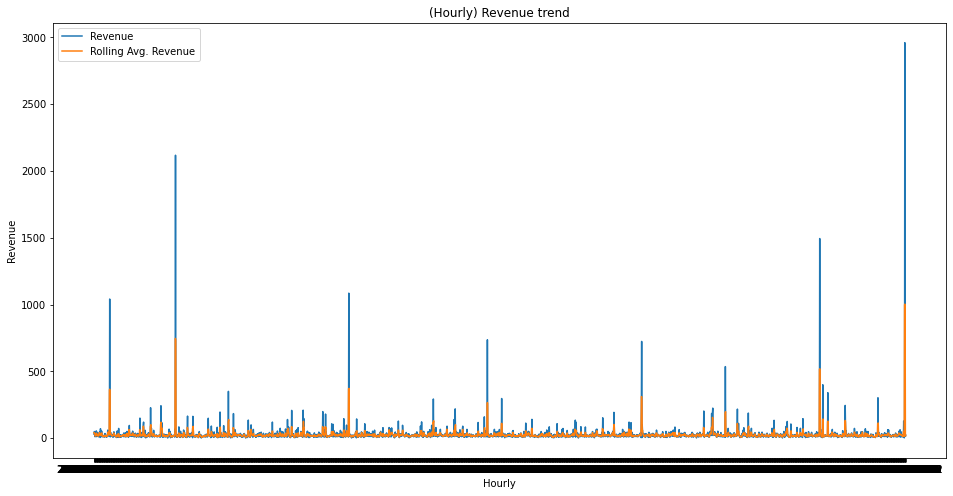

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

hourly_revenue_trend = spark.sql("""

WITH hourly_sales AS (
  SELECT 
    *,
    date_format(to_timestamp(InvoiceDate, "M/d/yyyy H:m"), "yyyy-MM-dd HH") AS hourly
  FROM retail
  WHERE Quantity > 0 AND 
        UnitPrice > 0 AND
        InvoiceNo NOT LIKE 'C%'
)

SELECT
  hourly,
  ROUND(AVG(Quantity*UnitPrice),2) AS avg_revenue,
  ROUND(AVG(AVG(Quantity*UnitPrice)) OVER(ORDER BY hourly ROWS BETWEEN 1 PRECEDING AND 1 FOLLOWING),2) AS rolling_avg
FROM hourly_sales
GROUP BY hourly
ORDER BY hourly

""")

hourly_revenue_trend_df = hourly_revenue_trend.toPandas()

# Plot hourly revenue trend
fig, axes = plt.subplots(figsize=(16,8))
sns.lineplot(data=hourly_revenue_trend_df, x="hourly", y="avg_revenue", label="Revenue",ax=axes)
sns.lineplot(data=hourly_revenue_trend_df, x="hourly", y="rolling_avg", label="Rolling Avg. Revenue", ax=axes)

axes.set(title="(Hourly) Revenue trend", xlabel="Hourly", ylabel="Revenue");

**Remarks**
- Within a year, we see 8 peaks (i.e., above 500/hour).

In [0]:
hourly_revenue_trend_df.describe()#.display()

avg_revenue 
 rolling_avg 
 
 
 
 
 count 
 2900.000000 
 2900.000000 
 
 
 mean 
 28.130890 
 28.131390 
 
 
 std 
 84.476618 
 49.298784 
 
 
 min 
 0.850000 
 5.810000 
 
 
 25% 
 12.470000 
 15.637500 
 
 
 50% 
 18.230000 
 20.215000 
 
 
 75% 
 26.302500 
 27.282500 
 
 
 max 
 2959.980000 
 1003.080000